# 溫度設定+2.5

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
rpm_LRT = pd.read_csv('./2024-12-19_15_03_23.csv')

C:\Users\包杰修\AppData\Local\Temp\ipykernel_31360\4150323208.py:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  rpm_LRT = pd.read_csv('./2024-12-19_15_03_23.csv')


In [8]:
rpm_LRT

,LRTTIME,X,Y,Z,T01,T02,T03,T04,T05,T06,...,T08,T09,T10,T11,T12,T13,T14,T15,RPM,Unnamed: 20
0,2024-12-19_15:03:23,2.037,-3.145,2.297,18.4,18.5,19.2,20.0,19.2,19.1,...,21.0,21.8,22.0,23.9,24.6,18.8,18.8,14.8,斷線,NaN
1,2024-12-19_15:03:45,2.058,-3.293,2.329,18.4,18.5,19.2,20.0,19.2,19.1,...,21.0,21.8,22.1,23.8,24.6,18.8,18.8,14.8,斷線,NaN
2,2024-12-19_15:03:45,2.058,-3.293,2.329,18.4,18.4,19.1,20.0,19.2,19.1,...,21.0,21.8,22.1,23.8,24.6,18.8,18.7,14.8,斷線,NaN
3,2024-12-19_15:03:46,2.057,-3.270,2.329,18.4,18.4,19.1,20.0,19.2,19.1,...,21.0,21.8,22.1,23.8,24.6,18.8,18.8,14.8,斷線,NaN
4,2024-12-19_15:03:47,2.078,-3.320,2.361,18.4,18.4,19.1,20.0,19.2,19.1,...,21.0,21.8,22.1,23.8,24.6,18.8,18.8,14.8,斷線,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53995,2024-12-20_06:06:23,-43.368,-5.850,21.745,18.1,18.1,19.0,20.5,19.2,19.4,...,23.6,24.5,23.0,25.7,26.9,18.3,18.3,13.3,0,NaN
53996,2024-12-20_06:06:24,-43.368,-5.876,21.745,18.1,18.1,19.0,20.5,19.2,19.4,...,23.6,24.5,23.0,25.7,26.9,18.3,18.3,13.3,0,NaN
53997,2024-12-20_06:06:25,-43.256,-5.877,21.502,18.1,18.1,18.9,20.5,19.2,19.4,...,23.6,24.5,23.0,25.7,26.9,18.3,18.3,13.3,0,NaN
53998,2024-12-20_06:06:26,-43.324,-5.876,21.579,18.1,18.1,18.9,20.5,19.2,19.4,...,23.6,24.5,23.0,25.7,26.9,18.3,18.3,13.3,0,NaN


In [5]:
# 檢查 'Z' 欄位的數據類型
print(rpm_LRT['Z'].dtype)

# 檢查 'Z' 欄位中是否有非數值的值
non_numeric = rpm_LRT['Z'].apply(lambda x: not isinstance(x, (int, float)) and not pd.isnull(x))
print("非數值的 'Z' 值有：")
print(rpm_LRT[non_numeric]['Z'].unique())


float64
非數值的 'Z' 值有：
[]


In [9]:
print(rpm_LRT["RPM"].unique())

['斷線' '0' '1500' '6000' 0 12000]


In [10]:
rpm_LRT['RPM'] = rpm_LRT['RPM'].replace('斷線', np.nan)

# Step 2: 將 'RPM' 欄位轉換為數值類型，無法轉換的設為 NaN
rpm_LRT['RPM'] = pd.to_numeric(rpm_LRT['RPM'], errors='coerce')

# Step 3: 使用線性插值方法替換 NaN
rpm_LRT['RPM'] = rpm_LRT['RPM'].interpolate(method='linear')

# Step 4: 處理可能仍存在的 NaN 值（例如，開頭或結尾的 NaN）
# 使用前向填充和後向填充
rpm_LRT['RPM'] = rpm_LRT['RPM'].fillna(method='bfill').fillna(method='ffill')

# 確認最終結果
print(rpm_LRT['RPM'])

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
53995    0.0
53996    0.0
53997    0.0
53998    0.0
53999    0.0
Name: RPM, Length: 54000, dtype: float64


C:\Users\包杰修\AppData\Local\Temp\ipykernel_31360\1446811528.py:11: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  rpm_LRT['RPM'] = rpm_LRT['RPM'].fillna(method='bfill').fillna(method='ffill')


In [11]:
# 檢查 'Z' 欄位的數據類型
print(rpm_LRT['RPM'].dtype)

# 檢查 'Z' 欄位中是否有非數值的值
non_numeric = rpm_LRT['RPM'].apply(lambda x: not isinstance(x, (int, float)) and not pd.isnull(x))
print("非數值的 'RPM' 值有：")
print(rpm_LRT[non_numeric]['RPM'].unique())

float64
非數值的 'RPM' 值有：
[]


In [12]:
def replace_z_with_avg(data):
    i = 0
    while i < len(data):
        if data[i] == 'Z':
            # 找到Z前後的有效數據
            start = i - 1
            end = i + 1
            while end < len(data) and data[end] == 'Z':
                end += 1
            
            # 確保前後都有有效數據
            if start >= 0 and end < len(data):
                try:
                    # 嘗試將前後的字串轉為數字
                    start_value = float(data[start])
                    end_value = float(data[end])
                    avg_value = (start_value + end_value) / 2
                    avg_value_str = str(avg_value)
                    for j in range(i, end):
                        data[j] = avg_value_str
                except ValueError:
                    print(f"無法轉換前後數據: {data[start]} 或 {data[end]}")
            elif start < 0 and end < len(data):  # 如果Z在最前面，取後面的值
                data[i:end] = [data[end]] * (end - i)
            elif start >= 0 and end >= len(data):  # 如果Z在最後面，取前面的值
                data[i:end] = [data[start]] * (end - i)
            i = end  # 跳過這段已經處理過的Z
        else:
            i += 1
    return data

# 應用 replace_z_with_avg 函數
rpm_LRT['Z'] = replace_z_with_avg(rpm_LRT['Z'].tolist())

# 將替換後的 'Z' 欄位轉換回數字
rpm_LRT['Z'] = pd.to_numeric(rpm_LRT['Z'], errors='coerce')

In [13]:
# 將 'Z' 欄位轉換為浮點數，無法轉換的設為 NaN
rpm_LRT['Z'] = pd.to_numeric(rpm_LRT['Z'], errors='coerce')

# 移除 'Z' 欄位中為 NaN 的行

# 確認轉換後的 'Z' 欄位
print(rpm_LRT['Z'].dtype)
print(rpm_LRT['Z'].head())


float64
0    2.297
1    2.329
2    2.329
3    2.329
4    2.361
Name: Z, dtype: float64


In [14]:
# 1. 識別 RPM 值的變化
rpm_LRT['RPM_Change'] = rpm_LRT['RPM'].ne(rpm_LRT['RPM'].shift())

# 2. 根據 RPM 變化分配組號
rpm_LRT['Group'] = rpm_LRT['RPM_Change'].cumsum()

# 3. 按組號和 RPM 值進行分組
grouped = rpm_LRT.groupby(['Group', 'RPM'])

# 初始化一個列表來存儲符合條件的組
desired_groups = []

for (group, rpm), group_df in grouped:
    if len(group_df) >= 20:  # 至少有 100 筆記錄的區段
        desired_groups.append(group_df.iloc[50:])  # 選取每組的前 100 筆

# 4. 計算每種 RPM 的段數
rpm_counts = {}
for group_df in desired_groups:
    rpm_value = group_df['RPM'].iloc[0]
    if rpm_value in rpm_counts:
        rpm_counts[rpm_value] += 1
    else:
        rpm_counts[rpm_value] = 1

# 總段數
total_segments = len(desired_groups)
print(f"總共有 {total_segments} 段符合條件的 RPM 區塊。")
print("每種 RPM 的段數：")
for rpm, count in rpm_counts.items():
    print(f"RPM {rpm} 的段數有 {count} 段。")

# 5. 列出每段的詳細信息
detailed_info = []
for i, group_df in enumerate(desired_groups, 1):
    start_idx = group_df.index.min()
    end_idx = group_df.index.max()
    rpm_value = group_df['RPM'].iloc[0]
    detailed_info.append({
        '段數': i,
        'RPM': rpm_value,
        '起始索引': start_idx,
        '結束索引': end_idx,
        '記錄數': len(group_df)
    })

detailed_df = pd.DataFrame(detailed_info)
print(detailed_df)

總共有 7 段符合條件的 RPM 區塊。
每種 RPM 的段數：
RPM 0.0 的段數有 4 段。
RPM 1500.0 的段數有 1 段。
RPM 6000.0 的段數有 1 段。
RPM 12000.0 的段數有 1 段。
   段數      RPM   起始索引   結束索引    記錄數
0   1      0.0     50   4496   4447
1   2   1500.0   4547  11604   7058
2   3      0.0  11655  22404  10750
3   4   6000.0  22455  29606   7152
4   5      0.0  29657  40406  10750
5   6  12000.0  40457  47608   7152
6   7      0.0  47659  53999   6341


In [15]:
import pandas as pd
import numpy as np

# 假設之前的程式碼已經執行並且 desired_groups 已經定義
# desired_groups 包含了所有符合條件的區段，每個區段是 DataFrame
rpm_LRT['Z'] = pd.to_numeric(rpm_LRT['Z'], errors='coerce')

# 初始化一個列表來存儲所有 "z" 的 NumPy 陣列
z_arrays = []

# 或者，使用字典來存儲，方便以後根據段數或 RPM 查找
z_arrays_dict = {}

# 遍歷所有符合條件的區段
for i, group_df in enumerate(desired_groups, 1):
    rpm_value = group_df['RPM'].iloc[0]
    if rpm_value != 0:
        # 提取 "z" 欄位並轉換為 NumPy 陣列
        z_array = group_df['Z'].to_numpy()
        
        # 將 NumPy 陣列添加到列表中
        z_arrays.append(z_array)
        
        # 或者，將其添加到字典中，鍵可以包含段數和 RPM 值
        z_arrays_dict[f'segment_{i}_RPM_{rpm_value}'] = z_array

# 現在，z_arrays 包含所有 RPM ≠ 0 的 "z" 陣列
# 而 z_arrays_dict 以鍵值對的形式存儲每個 "z" 陣列，便於查找

# 打印結果以確認
print(f"總共有 {len(z_arrays)} 個 'z' 陣列對應 RPM ≠ 0 的區段。")
for key, array in z_arrays_dict.items():
    print(f"{key}: {array}")

# 如果您希望進一步使用這些 NumPy 陣列，可以直接從列表或字典中訪問
# 例如，訪問第一個 "z" 陣列
first_z_array = z_arrays[0]
print("第一個 'z' 陣列:", first_z_array)

# 或者，通過字典鍵來訪問
specific_z_array = z_arrays_dict.get('segment_5_RPM_6000')
if specific_z_array is not None:
    print("段 5 的 'z' 陣列:", specific_z_array)


總共有 3 個 'z' 陣列對應 RPM ≠ 0 的區段。
segment_2_RPM_1500.0: [ 1.836  1.827  1.934 ... -4.93  -4.902 -4.942]
segment_4_RPM_6000.0: [ -0.628  -0.628  -0.695 ... -12.318 -12.318 -12.307]
segment_6_RPM_12000.0: [  5.223   5.115   5.398 ... -43.504 -43.565 -43.907]
第一個 'z' 陣列: [ 1.836  1.827  1.934 ... -4.93  -4.902 -4.942]


In [16]:
# 初始化一個列表來存儲每段的數據
time_rpm_t_boundaries = []

for i, group_df in enumerate(desired_groups, 1):
    # 確保區段不為空
    if not group_df.empty:
        # 提取開頭和結尾的數據
        start_time = group_df["LRTTIME"].iloc[0]
        end_time = group_df["LRTTIME"].iloc[-1]
        start_rpm = group_df["RPM"].iloc[0]
        end_rpm = group_df["RPM"].iloc[-1]
        start_t7 = group_df["T07"].iloc[0]
        end_t7 = group_df["T07"].iloc[-1]
        start_t12 = group_df["T11"].iloc[0]
        end_t12 = group_df["T11"].iloc[-1]
        start_t15 = group_df["T15"].iloc[0]
        end_t15 = group_df["T15"].iloc[-1]
        
        # 存儲結果到列表中
        time_rpm_t_boundaries.append({
            "Segment": i,
            "Start_Time": start_time,
            "End_Time": end_time,
            "Start_RPM": start_rpm,
            "End_RPM": end_rpm,
            "Start_T7": start_t7,
            "End_T7": end_t7,
            "Start_T12": start_t12,
            "End_T12": end_t12,
            "Start_T15": start_t15,
            "End_T15": end_t15
        })

# 將結果轉換為 DataFrame 以便查看或導出
time_rpm_t_boundaries_df = pd.DataFrame(time_rpm_t_boundaries)

# 打印結果檢查
print("各區段的開頭與結尾時間、RPM，以及 T07、T11 和 T15：")
print(time_rpm_t_boundaries_df)

各區段的開頭與結尾時間、RPM，以及 T07、T11 和 T15：
   Segment           Start_Time             End_Time  Start_RPM  End_RPM  \
0        1  2024-12-19_15:04:55  2024-12-19_16:19:51        0.0      0.0   
1        2  2024-12-19_16:20:41  2024-12-19_18:19:52     1500.0   1500.0   
2        3  2024-12-19_18:20:42  2024-12-19_21:19:52        0.0      0.0   
3        4  2024-12-19_21:20:43  2024-12-19_23:19:53     6000.0   6000.0   
4        5  2024-12-19_23:20:44  2024-12-20_02:19:54        0.0      0.0   
5        6  2024-12-20_02:20:44  2024-12-20_04:19:56    12000.0  12000.0   
6        7  2024-12-20_04:20:46  2024-12-20_06:06:27        0.0      0.0   

   Start_T7  End_T7  Start_T12  End_T12  Start_T15  End_T15  
0      19.4    19.3       23.8     24.8       14.8     14.8  
1      19.4    21.8       25.1     36.2       14.8     14.1  
2      21.0    19.1       35.9     24.3       14.0     13.6  
3      19.3    24.1       25.0     42.2       13.6     13.6  
4      23.8    19.1       41.7     24.4       1

In [17]:
# 定義 modify 函數
def modify(arr):
    return arr - arr[0]

# 初始化一個新的字典來存儲修改後的 "Z" 陣列
modified_z_arrays_dict = {}

# 遍歷所有符合條件的 "Z" 陣列
for key, z_array in z_arrays_dict.items():
    try:
        # 確保 z_array 是浮點數陣列
        z_float = z_array.astype(float)
        
        # 應用 modify 函數
        modified_z = modify(z_float)
        
        # 存儲修改後的陣列到新的字典
        modified_z_arrays_dict[key] = modified_z
    except ValueError as e:
        print(f"轉換錯誤在 {key}: {e}")

# 打印結果以確認
print(f"總共有 {len(modified_z_arrays_dict)} 個修改後的 'Z' 陣列。")
for key, array in modified_z_arrays_dict.items():
    print(f"{key}: {array}")


總共有 3 個修改後的 'Z' 陣列。
segment_2_RPM_1500.0: [ 0.    -0.009  0.098 ... -6.766 -6.738 -6.778]
segment_4_RPM_6000.0: [  0.      0.     -0.067 ... -11.69  -11.69  -11.679]
segment_6_RPM_12000.0: [  0.     -0.108   0.175 ... -48.727 -48.788 -49.13 ]


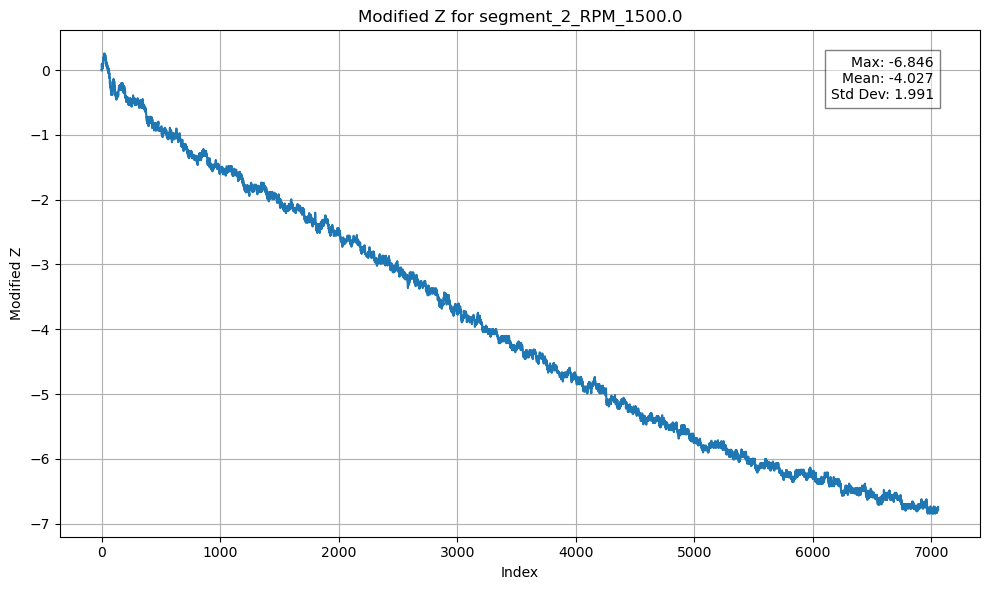

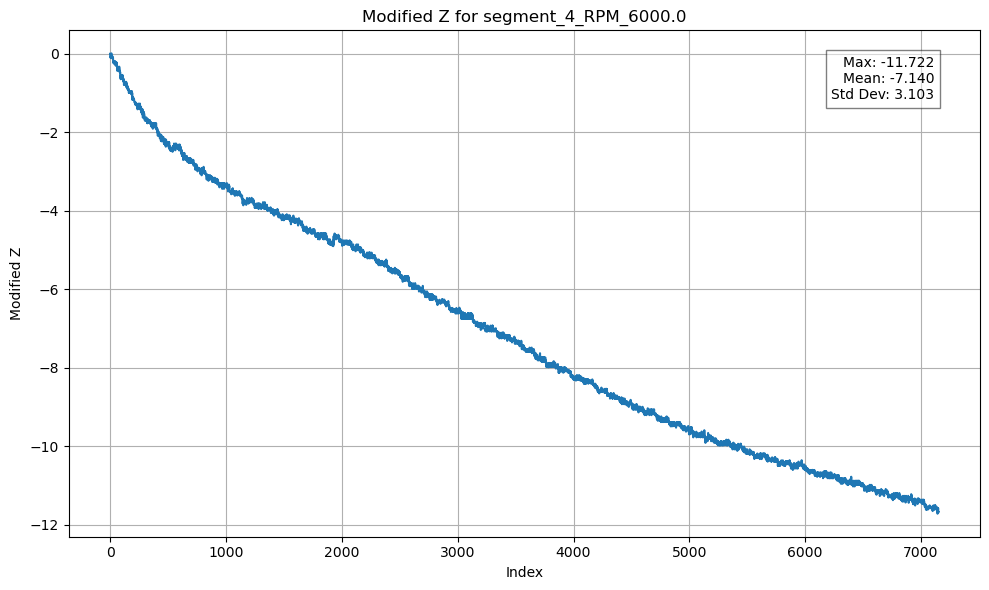

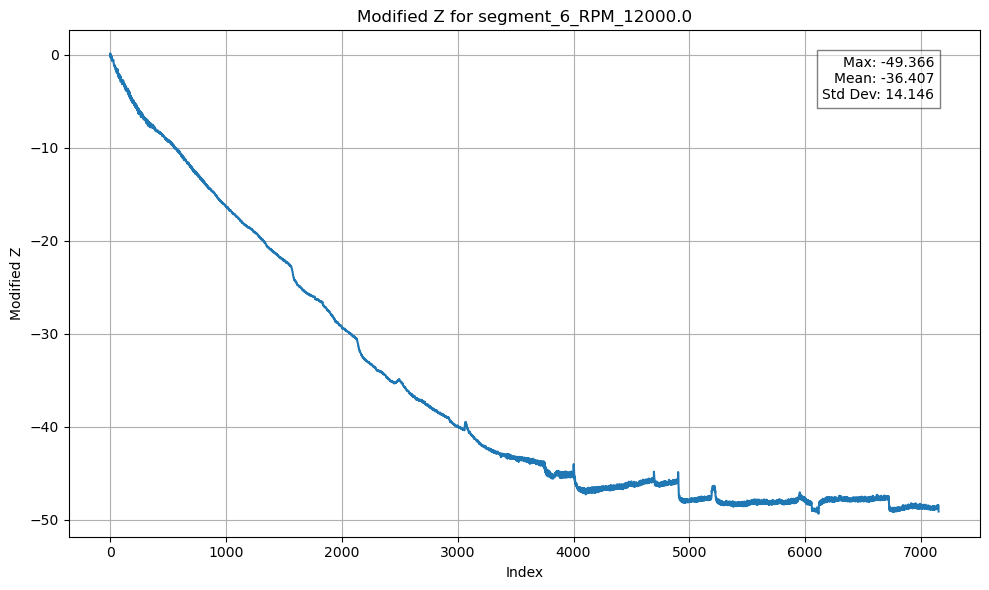


各段數的統計值（最大值、平均值、標準差）：
  段數      RPM     最大值     平均值    標準差
0  2   1500.0  -6.846  -4.027  1.991
1  4   6000.0 -11.722  -7.140  3.103
2  6  12000.0 -49.366 -36.407 14.146


In [18]:
# 初始化一個列表來存儲統計信息
stats_info = []

# 遍歷每個修改後的 'Z' 陣列，繪製圖表並計算統計值
for key, array in modified_z_arrays_dict.items():
    # 計算統計值
    max_val = np.min(array)
    mean_val = np.mean(array)
    std_val = np.std(array)
    
    # 從鍵名中提取段數和 RPM 值
    parts = key.split('_')
    segment_num = parts[1]
    rpm_value = parts[3]
    
    # 添加到統計信息列表
    stats_info.append({
        '段數': segment_num,
        'RPM': rpm_value,
        '最大值': max_val,
        '平均值': mean_val,
        '標準差': std_val
    })
    
    # 繪製圖表
    plt.figure(figsize=(10, 6))
    plt.plot(array, linestyle='-', markersize=4)
    plt.xlabel('Index')
    plt.ylabel('Modified Z')
    plt.title(f'Modified Z for {key}')
    plt.grid(True)
    
    # 添加統計值到圖表中
    stats_text = f"Max: {max_val:.3f}\nMean: {mean_val:.3f}\nStd Dev: {std_val:.3f}"
    plt.text(0.95, 0.95, stats_text, horizontalalignment='right',
             verticalalignment='top', transform=plt.gca().transAxes,
             bbox=dict(facecolor='white', alpha=0.5))
    
    plt.tight_layout()
    plt.show()
    
    # （可選）保存圖表為圖片文件
    # filename = f"{key}_modified_z_plot.png"
    # plt.savefig(filename)
    # print(f"已保存 {filename}")

# 將統計信息轉換為 DataFrame
stats_df = pd.DataFrame(stats_info)

# 設定顯示格式（可選）
pd.set_option('display.float_format', '{:.3f}'.format)

# 打印統計信息表
print("\n各段數的統計值（最大值、平均值、標準差）：")
print(stats_df)

In [19]:
# 初始化一個新的字典來存儲對應的 "T15" 陣列
t15_arrays_dict = {}

# 遍歷所有符合條件的區段
for key, group_df in z_arrays_dict.items():
    try:
        # 確保該區段的 DataFrame 包含 "T15" 欄位
        if "T15" in desired_groups[int(key.split('_')[1]) - 1].columns:
            # 提取 "T15" 欄位並轉為 NumPy 陣列
            t15_array = desired_groups[int(key.split('_')[1]) - 1]["T15"].to_numpy()
            
            # 存儲到新的字典中
            t15_arrays_dict[key] = t15_array
        else:
            print(f"{key} 沒有 'T15' 欄位。")
    except Exception as e:
        print(f"在處理 {key} 時出現錯誤: {e}")

# 打印結果以確認
print(f"總共有 {len(t15_arrays_dict)} 個 'T15' 陣列。")
for key, array in t15_arrays_dict.items():
    print(f"{key}: {array}")


總共有 3 個 'T15' 陣列。
segment_2_RPM_1500.0: [14.8 14.8 14.8 ... 14.1 14.1 14.1]
segment_4_RPM_6000.0: [13.6 13.6 13.6 ... 13.6 13.6 13.6]
segment_6_RPM_12000.0: [13.4 13.4 13.4 ... 13.7 13.7 13.7]


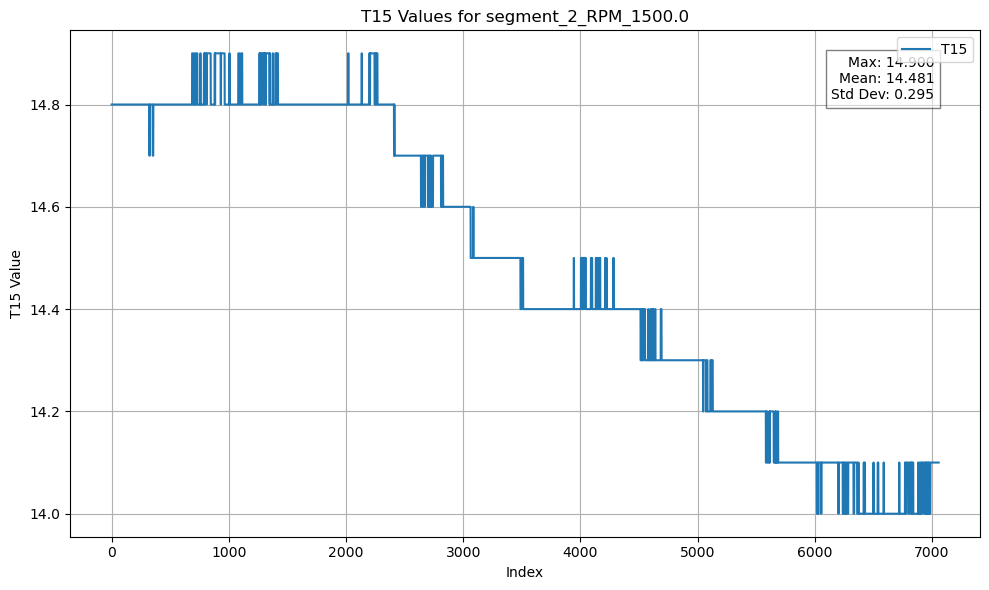

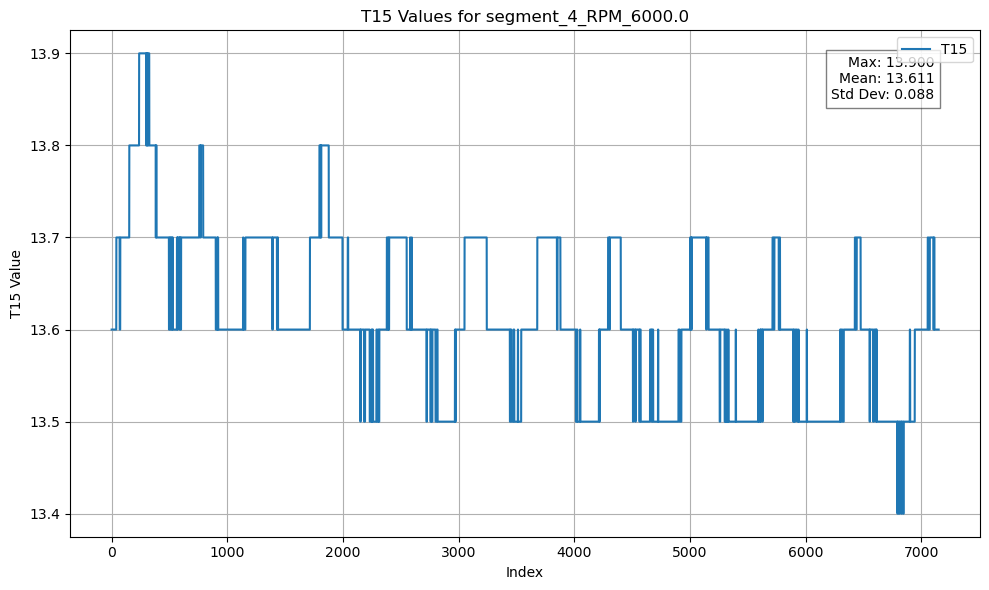

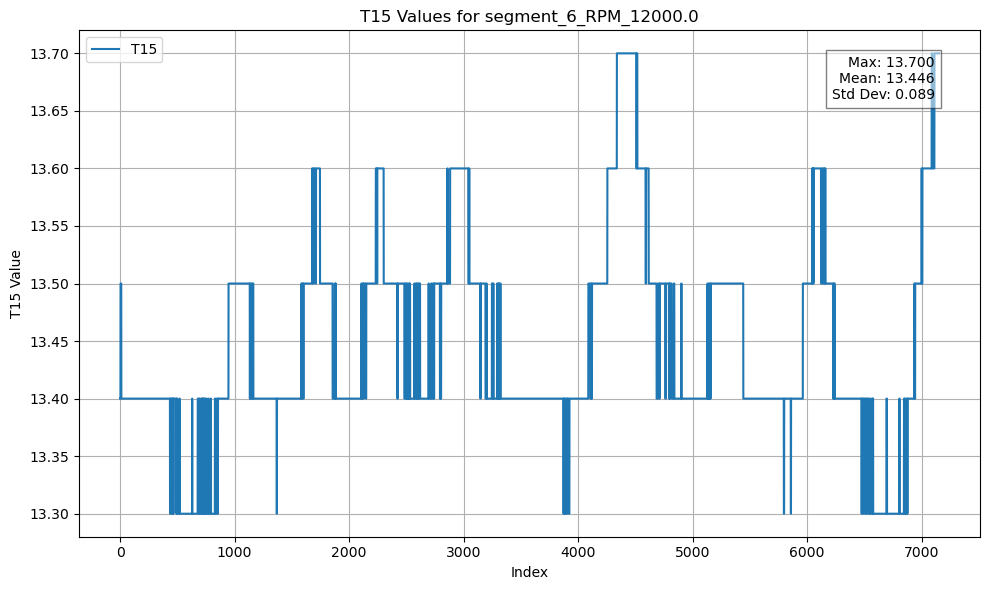


各段數的 T15 統計值（最大值、平均值、標準差）：
  段數      RPM    最大值    平均值   標準差
0  2   1500.0 14.900 14.481 0.295
1  4   6000.0 13.900 13.611 0.088
2  6  12000.0 13.700 13.446 0.089


In [23]:
# 初始化一個列表來存儲 T15 的統計信息
t15_stats_info = []

# 遍歷每個 'T15' 陣列，繪製圖表並計算統計值
for key, t15_array in t15_arrays_dict.items():
    # 計算統計值
    max_val = np.max(t15_array)
    mean_val = np.mean(t15_array)
    std_val = np.std(t15_array)
    
    # 從鍵名中提取段數和 RPM 值
    parts = key.split('_')
    segment_num = parts[1]
    rpm_value = parts[3]
    
    # 添加到統計信息列表
    t15_stats_info.append({
        '段數': segment_num,
        'RPM': rpm_value,
        '最大值': max_val,
        '平均值': mean_val,
        '標準差': std_val
    })
    
    # 繪製圖表
    plt.figure(figsize=(10, 6))
    plt.plot(t15_array, linestyle='-', markersize=4, label='T15')
    plt.xlabel('Index')
    plt.ylabel('T15 Value')
    plt.title(f'T15 Values for {key}')
    plt.grid(True)
    
    # 添加統計值到圖表中
    stats_text = f"Max: {max_val:.3f}\nMean: {mean_val:.3f}\nStd Dev: {std_val:.3f}"
    plt.text(0.95, 0.95, stats_text, horizontalalignment='right',
             verticalalignment='top', transform=plt.gca().transAxes,
             bbox=dict(facecolor='white', alpha=0.5))
    
    plt.tight_layout()
    plt.legend()
    plt.show()
    
    # （可選）保存圖表為圖片文件
    # filename = f"{key}_t15_plot.png"
    # plt.savefig(filename)
    # print(f"已保存 {filename}")

# 將統計信息轉換為 DataFrame
t15_stats_df = pd.DataFrame(t15_stats_info)

# 設定顯示格式（可選）
pd.set_option('display.float_format', '{:.3f}'.format)

# 打印統計信息表
print("\n各段數的 T15 統計值（最大值、平均值、標準差）：")
print(t15_stats_df)


In [24]:
for key, array in modified_z_arrays_dict.items():
    if np.isnan(array).any():
        print(f"{key} 包含 NaN 值。")
    else:
        print(f"{key} 不包含 NaN 值。")


segment_2_RPM_1500.0 不包含 NaN 值。
segment_4_RPM_6000.0 不包含 NaN 值。
segment_6_RPM_12000.0 不包含 NaN 值。


In [25]:
# # 初始化一個列表來存儲每段的開頭與結尾時間及 RPM
# time_rpm_boundaries = []

# # 遍歷所有符合條件的區段
# for i, group_df in enumerate(desired_groups, 1):
#     # 確保區段不為空
#     if not group_df.empty:
#         # 提取開頭和結尾的 "Time" 及對應的 "RPM"
#         start_time = group_df["LRTTIME"].iloc[0]
#         end_time = group_df["LRTTIME"].iloc[-1]
#         start_rpm = group_df["RPM"].iloc[0]
#         end_rpm = group_df["RPM"].iloc[-1]
        
#         # 存儲結果到列表中
#         time_rpm_boundaries.append({
#             "Segment": i,
#             "Start_Time": start_time,
#             "End_Time": end_time,
#             "Start_RPM": start_rpm,
#             "End_RPM": end_rpm
#         })

# # 將結果轉換為 DataFrame 以便查看或導出
# time_rpm_boundaries_df = pd.DataFrame(time_rpm_boundaries)

# # 打印結果檢查
# print("各區段的開頭與結尾時間及對應的 RPM：")
# print(time_rpm_boundaries_df)

# # 如果需要保存為檔案，使用以下代碼
# # time_rpm_boundaries_df.to_csv("time_rpm_boundaries.csv", index=False)


## Energy Consumption

In [26]:
import pandas as pd

In [49]:
import chardet

# 檢測編碼
with open('./device1_data_1213.csv', 'rb') as file:
    result = chardet.detect(file.read(10000))
    print(result)


{'encoding': 'UTF-8-SIG', 'confidence': 1.0, 'language': ''}


In [27]:
device1_1213 = pd.read_csv('./device1_data_1219.csv', encoding='UTF-8-SIG')
# device1_1018.rename(columns={'ÿTime': 'Time'}, inplace=True)

device1_1213

,Time,Phace Vavg,Line Vavg,Aavg,PF,F,VADATA,WDATA,QDATA,W Accumulate,Q Accumulate,CO2 Data
0,2024-12-19 14:18:32,0,0.000,0.000,0.000,0.000,0,0,0,0.000,0.000,0.000
1,2024-12-19 14:18:34,0,221.100,3.888,0.697,60.040,1475,1029,1057,6.100,6.200,3.019
2,2024-12-19 14:18:36,0,221.100,3.884,0.697,60.040,1475,1028,1057,6.100,6.300,3.019
3,2024-12-19 14:18:38,0,221.000,3.885,0.698,60.040,1474,1029,1056,6.200,6.300,3.069
4,2024-12-19 14:18:40,0,220.900,3.926,0.703,60.040,1487,1045,1057,6.300,6.400,3.119
...,...,...,...,...,...,...,...,...,...,...,...,...
32395,2024-12-20 08:24:43,0,221.800,3.868,0.693,59.960,1476,1024,1064,1920.400,1966.400,950.598
32396,2024-12-20 08:24:45,0,221.800,3.879,0.694,59.950,1480,1028,1066,1920.500,1966.500,950.648
32397,2024-12-20 08:24:47,0,221.900,3.877,0.694,59.950,1480,1028,1065,1920.500,1966.600,950.648
32398,2024-12-20 08:24:49,0,221.900,3.881,0.694,59.950,1480,1028,1065,1920.600,1966.600,950.697


In [28]:
device2_1213 = pd.read_csv('./device2_data_1219.csv', encoding='UTF-8-SIG')
# device2_1018.rename(columns={'ÿTime': 'Time'}, inplace=True)

device2_1213

,Time,Phace Vavg,Line Vavg,Aavg,PF,F,VADATA,WDATA,QDATA,W Accumulate,Q Accumulate,CO2 Data
0,2024-12-19 14:18:33,0,221.000,11.600,0.491,60.050,2677,1315,2331,0.077,0.137,0.038
1,2024-12-19 14:18:35,0,221.000,11.614,0.490,60.050,2678,1312,2335,0.077,0.138,0.038
2,2024-12-19 14:18:37,0,220.900,11.558,0.488,60.050,2661,1299,2322,0.078,0.139,0.039
3,2024-12-19 14:18:39,0,220.800,11.578,0.488,60.050,2673,1306,2332,0.079,0.141,0.039
4,2024-12-19 14:18:41,0,221.000,11.610,0.491,60.050,2686,1318,2340,0.080,0.142,0.039
...,...,...,...,...,...,...,...,...,...,...,...,...
32395,2024-12-20 08:24:44,0,221.800,12.171,0.494,59.970,3096,1530,2692,34.422,56.661,17.039
32396,2024-12-20 08:24:46,0,221.800,12.197,0.492,59.960,3112,1532,2708,34.423,56.662,17.039
32397,2024-12-20 08:24:48,0,221.700,12.193,0.492,59.960,3096,1522,2696,34.423,56.664,17.040
32398,2024-12-20 08:24:50,0,221.800,12.202,0.492,59.970,3098,1523,2698,34.424,56.665,17.040


In [30]:
import pandas as pd

# 假設你已經有一個 DataFrame 包含時間段數據
data = time_rpm_t_boundaries_df

# 確保 'Time' 欄位轉換為 datetime 格式
data['Start_Time'] = pd.to_datetime(data['Start_Time'], format='%Y-%m-%d_%H:%M:%S', errors='coerce')
data['End_Time'] = pd.to_datetime(data['End_Time'], format='%Y-%m-%d_%H:%M:%S', errors='coerce')


# 篩選有指定 RPM 值的時間段（1500、6000、12000）
rpm_values = [1500, 6000, 12000]
filtered_segments = data[(data['Start_RPM'].isin(rpm_values)) | (data['End_RPM'].isin(rpm_values))]

# 遍歷有指定 RPM 的時間段，並套用到計算程式中
for index, row in filtered_segments.iterrows():
    start_time = row['Start_Time']
    end_time = row['End_Time']
    rpm_value = row['Start_RPM'] if row['Start_RPM'] in rpm_values else row['End_RPM']

    # 篩選時間範圍內的數據
    filtered_device1 = device1_1213[(device1_1213['Time'] >= start_time) & (device1_1213['Time'] <= end_time)]
    filtered_device2 = device2_1213[(device2_1213['Time'] >= start_time) & (device2_1213['Time'] <= end_time)]

    # 計算時間間隔（以秒為單位）
    filtered_device1['Time Interval (s)'] = filtered_device1['Time'].diff().dt.total_seconds().fillna(0)
    filtered_device2['Time Interval (s)'] = filtered_device2['Time'].diff().dt.total_seconds().fillna(0)

    # 計算每段時間的能耗 (E = V * I * t)
    filtered_device1['Energy (Wh)'] = (filtered_device1['Line Vavg'] * filtered_device1['Aavg'] * filtered_device1['Time Interval (s)']) / 3600
    filtered_device2['Energy (Wh)'] = (filtered_device2['Line Vavg'] * filtered_device2['Aavg'] * filtered_device2['Time Interval (s)']) / 3600

    # 計算總能耗 (Wh)
    total_energy_device1 = filtered_device1['Energy (Wh)'].sum()
    total_energy_device2 = filtered_device2['Energy (Wh)'].sum()

    # 計算總能耗總和
    total_energy_sum = total_energy_device1 + total_energy_device2

    # 印出結果
    print(f"Segment {row['Segment']} (RPM: {rpm_value})")
    print("總能耗 (Device 1 + Device 2) (Wh):", total_energy_sum)
    print("---")



TypeError: '>=' not supported between instances of 'str' and 'Timestamp'

In [33]:
import pandas as pd

# 假設你已經有一個 DataFrame 包含時間段數據
data = time_rpm_t_boundaries_df

# 確保 'Start_Time' 和 'End_Time' 欄位轉換為 datetime 格式
data['Start_Time'] = pd.to_datetime(data['Start_Time'], format='%Y-%m-%d_%H:%M:%S', errors='coerce')
data['End_Time'] = pd.to_datetime(data['End_Time'], format='%Y-%m-%d_%H:%M:%S', errors='coerce')

# 篩選有指定 RPM 值的時間段（1500、6000、12000）
rpm_values = [1500, 6000, 12000]
filtered_segments = data[(data['Start_RPM'].isin(rpm_values)) | (data['End_RPM'].isin(rpm_values))]

# 確保 device1_1213 和 device2_1213 的 'Time' 欄位已轉換為 datetime
device1_1213['Time'] = pd.to_datetime(device1_1213['Time'], errors='coerce')
device2_1213['Time'] = pd.to_datetime(device2_1213['Time'], errors='coerce')

# 移除包含 NaT 的行
device1_1213 = device1_1213.dropna(subset=['Time'])
device2_1213 = device2_1213.dropna(subset=['Time'])

# 遍歷有指定 RPM 的時間段，並套用到計算程式中
for index, row in filtered_segments.iterrows():
    start_time = row['Start_Time']
    end_time = row['End_Time']
    rpm_value = row['Start_RPM'] if row['Start_RPM'] in rpm_values else row['End_RPM']

    # 篩選時間範圍內的數據
    try:
        filtered_device1 = device1_1213[(device1_1213['Time'] >= start_time) & (device1_1213['Time'] <= end_time)]
        filtered_device2 = device2_1213[(device2_1213['Time'] >= start_time) & (device2_1213['Time'] <= end_time)]
    except TypeError as e:
        print("篩選時發生錯誤:", e)
        print("start_time:", start_time, type(start_time))
        print("end_time:", end_time, type(end_time))
        print("device1_1213['Time'] 前五個值:", device1_1213['Time'].head())
        raise

    # 計算時間間隔（以秒為單位）
    filtered_device1 = filtered_device1.sort_values('Time')  # 確保按時間排序
    filtered_device2 = filtered_device2.sort_values('Time')

    filtered_device1['Time Interval (s)'] = filtered_device1['Time'].diff().dt.total_seconds().fillna(0)
    filtered_device2['Time Interval (s)'] = filtered_device2['Time'].diff().dt.total_seconds().fillna(0)

    # 計算每段時間的能耗 (E = V * I * t)
    filtered_device1['Energy (Wh)'] = (filtered_device1['Line Vavg'] * filtered_device1['Aavg'] * filtered_device1['Time Interval (s)']) / 3600
    filtered_device2['Energy (Wh)'] = (filtered_device2['Line Vavg'] * filtered_device2['Aavg'] * filtered_device2['Time Interval (s)']) / 3600

    # 計算總能耗 (Wh)
    total_energy_device1 = filtered_device1['Energy (Wh)'].sum()
    total_energy_device2 = filtered_device2['Energy (Wh)'].sum()

    # 計算總能耗總和
    total_energy_sum = total_energy_device1 + total_energy_device2

    # 印出結果
    print(f"Segment {row['Segment']} (RPM: {rpm_value})")
    print("總能耗 (Device 1 + Device 2) (Wh):", total_energy_sum)
    print("---")


Segment 2 (RPM: 1500.0)
總能耗 (Device 1 + Device 2) (Wh): 7820.674887944445
---
Segment 4 (RPM: 6000.0)
總能耗 (Device 1 + Device 2) (Wh): 7651.631966222222
---
Segment 6 (RPM: 12000.0)
總能耗 (Device 1 + Device 2) (Wh): 7999.611336972222
---


In [36]:
# 確保 'Time' 欄位轉換為 datetime 格式
device1_1213['Time'] = pd.to_datetime(device1_1213['Time'], errors='coerce')
device2_1213['Time'] = pd.to_datetime(device2_1213['Time'], errors='coerce')

# 移除包含 NaT 的行
device1_1213 = device1_1213.dropna(subset=['Time'])
device2_1213 = device2_1213.dropna(subset=['Time'])

# 遍歷有指定 RPM 的時間段，並套用到計算程式中
for index, row in filtered_segments.iterrows():
    start_time = row['Start_Time']
    end_time = row['End_Time']
    rpm_value = row['Start_RPM'] if row['Start_RPM'] in rpm_values else row['End_RPM']

    # 篩選時間範圍內的數據
    filtered_device1 = device1_1213[(device1_1213['Time'] >= start_time) & (device1_1213['Time'] <= end_time)]
    filtered_device2 = device2_1213[(device2_1213['Time'] >= start_time) & (device2_1213['Time'] <= end_time)]

    # 確認篩選後的資料非空
    if not filtered_device1.empty:
        w_accumulate_device1 = filtered_device1['W Accumulate'].iloc[-1] - filtered_device1['W Accumulate'].iloc[0]
        w_accumulate_device1 =w_accumulate_device1*10
    else:
        w_accumulate_device1 = 0  # 若無數據，設為0

    if not filtered_device2.empty:
        w_accumulate_device2 = filtered_device2['W Accumulate'].iloc[-1] - filtered_device2['W Accumulate'].iloc[0]
        w_accumulate_device2 = w_accumulate_device2*1000
    else:
        w_accumulate_device2 = 0  # 若無數據，設為0

    # 印出結果
    print(f"Segment {row['Segment']} (RPM: {rpm_value})")
    print(f"Device 1 W Accumulate: {w_accumulate_device1}")
    print(f"Device 2 W Accumulate: {w_accumulate_device2}")
    print(f"Total W Accumulate: {w_accumulate_device1 + w_accumulate_device2}")

    print("---")


Segment 2 (RPM: 1500.0)
Device 1 W Accumulate: 2113.0
Device 2 W Accumulate: 4242.165999999999
Total W Accumulate: 6355.165999999999
---
Segment 4 (RPM: 6000.0)
Device 1 W Accumulate: 2094.0
Device 2 W Accumulate: 4250.079999999999
Total W Accumulate: 6344.079999999999
---
Segment 6 (RPM: 12000.0)
Device 1 W Accumulate: 2135.0
Device 2 W Accumulate: 4943.909999999999
Total W Accumulate: 7078.909999999999
---


In [ ]:
import pandas as pd

# 假設你的 DataFrame 名為 df
# 確保時間格式正確
df = device1_1213
df['Time'] = pd.to_datetime(df['Time'])

# 設定起點與結束時間 2024-12-12_15:34:15  2024-12-12_17:33:25
start_time = '2024-12-12 15:34:15'
end_time = '2024-12-12 17:33:25'

# 篩選時間範圍內的數據
filtered_df = df[(df['Time'] >= start_time) & (df['Time'] <= end_time)]


# 計算時間間隔（以秒為單位）
filtered_df['Time Interval (s)'] = filtered_df['Time'].diff().dt.total_seconds().fillna(0)

# 計算每段時間的能耗 (E = V * I * t)
filtered_df['Energy (Wh)'] = (filtered_df['Line Vavg'] * filtered_df['Aavg'] * filtered_df['Time Interval (s)']) / 3600  # 換算成瓦時(Wh)

# 計算總能耗 (Wh)
total_energy_wh = filtered_df['Energy (Wh)'].sum()

# 計算總時間（以秒為單位）
total_time_seconds = (filtered_df['Time'].iloc[-1] - filtered_df['Time'].iloc[0]).total_seconds()

# 計算平均功率 (W)
average_power_w = total_energy_wh * 3600 / total_time_seconds  # 轉換成瓦特

print("總能耗 (Wh):", total_energy_wh)
print("平均功率 (W):", average_power_w)


總能耗 (Wh): 1713.7902363333333
平均功率 (W): 863.128826357023


C:\Users\包杰修\AppData\Local\Temp\ipykernel_31204\1756785056.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Time Interval (s)'] = filtered_df['Time'].diff().dt.total_seconds().fillna(0)
C:\Users\包杰修\AppData\Local\Temp\ipykernel_31204\1756785056.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Energy (Wh)'] = (filtered_df['Line Vavg'] * filtered_df['Aavg'] * filtered_df['Time Interval (s)']) / 3600  # 換算成瓦時(Wh)


,Time,Phace Vavg,Line Vavg,Aavg,PF,F,VADATA,WDATA,QDATA,W Accumulate,Q Accumulate,CO2 Data
0,2024-12-12 15:32:22,0,223.900,10.975,0.565,60.000,2743,1550,2263,0.079,0.115,0.039
1,2024-12-12 15:32:24,0,223.900,11.034,0.565,59.990,2749,1553,2269,0.080,0.116,0.040
2,2024-12-12 15:32:26,0,223.900,11.081,0.564,59.990,2759,1556,2279,0.081,0.117,0.040
3,2024-12-12 15:32:28,0,223.900,11.073,0.565,59.980,2758,1559,2275,0.082,0.119,0.040
4,2024-12-12 15:32:30,0,223.800,11.000,0.566,59.980,2741,1552,2259,0.082,0.120,0.041
...,...,...,...,...,...,...,...,...,...,...,...,...
30595,2024-12-13 08:40:06,0,225.100,12.548,0.494,59.950,3553,1757,3089,35.592,58.277,17.618
30596,2024-12-13 08:40:08,0,225.100,12.551,0.498,59.940,3551,1767,3080,35.593,58.278,17.618
30597,2024-12-13 08:40:10,0,225.200,12.528,0.498,59.940,3552,1769,3080,35.594,58.280,17.619
30598,2024-12-13 08:40:12,0,225.500,12.549,0.498,59.960,3560,1775,3087,35.595,58.282,17.619


In [33]:
import pandas as pd

# 假設你的 DataFrame 名為 df
# 確保時間格式正確
df = device2_1212
df['Time'] = pd.to_datetime(df['Time'])

# 設定起點與結束時間 2024-12-12_15:34:15  2024-12-12_17:33:25
start_time = '2024-12-12 15:34:15'
end_time = '2024-12-12 17:33:25'

filtered_df = df[(df['Time'] >= start_time) & (df['Time'] <= end_time)]

# 計算時間間隔（以秒為單位）
filtered_df['Time Interval (s)'] = filtered_df['Time'].diff().dt.total_seconds().fillna(0)

# 計算每段時間的能耗 (E = V * I * t)
filtered_df['Energy (Wh)'] = (filtered_df['Line Vavg'] * filtered_df['Aavg'] * filtered_df['Time Interval (s)']) / 3600  # 換算成瓦時(Wh)

# 計算總能耗 (Wh)
total_energy_wh = filtered_df['Energy (Wh)'].sum()

# 計算總時間（以秒為單位）
total_time_seconds = (filtered_df['Time'].iloc[-1] - filtered_df['Time'].iloc[0]).total_seconds()

# 計算平均功率 (W)
average_power_w = total_energy_wh * 3600 / total_time_seconds  # 轉換成瓦特

print("總能耗 (Wh):", total_energy_wh)
print("平均功率 (W):", average_power_w)


總能耗 (Wh): 6014.108322638889
平均功率 (W): 3028.082512097902


C:\Users\包杰修\AppData\Local\Temp\ipykernel_31204\1913085941.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Time Interval (s)'] = filtered_df['Time'].diff().dt.total_seconds().fillna(0)
C:\Users\包杰修\AppData\Local\Temp\ipykernel_31204\1913085941.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Energy (Wh)'] = (filtered_df['Line Vavg'] * filtered_df['Aavg'] * filtered_df['Time Interval (s)']) / 3600  # 換算成瓦時(Wh)


In [51]:
print(1713.7902 +6014.108322638889 )

7727.898522638889


# 6000Rpm

In [ ]:
# 2024-12-12_20:34:17  2024-12-12_22:33:27

In [52]:
import pandas as pd

# 假設你的 DataFrame 名為 df
# 確保時間格式正確
df = device1_1212
df['Time'] = pd.to_datetime(df['Time'])

# 設定起點與結束時間 2024-12-12_15:34:15  2024-12-12_17:33:25
start_time = '2024-12-12 20:34:17'
end_time = '2024-12-12 22:33:27'

# 篩選時間範圍內的數據
filtered_df = df[(df['Time'] >= start_time) & (df['Time'] <= end_time)]


# 計算時間間隔（以秒為單位）
filtered_df['Time Interval (s)'] = filtered_df['Time'].diff().dt.total_seconds().fillna(0)

# 計算每段時間的能耗 (E = V * I * t)
filtered_df['Energy (Wh)'] = (filtered_df['Line Vavg'] * filtered_df['Aavg'] * filtered_df['Time Interval (s)']) / 3600  # 換算成瓦時(Wh)

# 計算總能耗 (Wh)
total_energy_wh = filtered_df['Energy (Wh)'].sum()

# 計算總時間（以秒為單位）
total_time_seconds = (filtered_df['Time'].iloc[-1] - filtered_df['Time'].iloc[0]).total_seconds()

# 計算平均功率 (W)
average_power_w = total_energy_wh * 3600 / total_time_seconds  # 轉換成瓦特

print("總能耗 (Wh):", total_energy_wh)
print("平均功率 (W):", average_power_w)


總能耗 (Wh): 1716.1681841111113
平均功率 (W): 864.3264497481814


C:\Users\包杰修\AppData\Local\Temp\ipykernel_31204\1371362116.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Time Interval (s)'] = filtered_df['Time'].diff().dt.total_seconds().fillna(0)
C:\Users\包杰修\AppData\Local\Temp\ipykernel_31204\1371362116.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Energy (Wh)'] = (filtered_df['Line Vavg'] * filtered_df['Aavg'] * filtered_df['Time Interval (s)']) / 3600  # 換算成瓦時(Wh)


In [53]:
import pandas as pd

# 假設你的 DataFrame 名為 df
# 確保時間格式正確
df = device2_1212
df['Time'] = pd.to_datetime(df['Time'])

# 設定起點與結束時間 2024-12-12_15:34:15  2024-12-12_17:33:25
start_time = '2024-12-12 20:34:17'
end_time = '2024-12-12 22:33:27'

filtered_df = df[(df['Time'] >= start_time) & (df['Time'] <= end_time)]

# 計算時間間隔（以秒為單位）
filtered_df['Time Interval (s)'] = filtered_df['Time'].diff().dt.total_seconds().fillna(0)

# 計算每段時間的能耗 (E = V * I * t)
filtered_df['Energy (Wh)'] = (filtered_df['Line Vavg'] * filtered_df['Aavg'] * filtered_df['Time Interval (s)']) / 3600  # 換算成瓦時(Wh)

# 計算總能耗 (Wh)
total_energy_wh = filtered_df['Energy (Wh)'].sum()

# 計算總時間（以秒為單位）
total_time_seconds = (filtered_df['Time'].iloc[-1] - filtered_df['Time'].iloc[0]).total_seconds()

# 計算平均功率 (W)
average_power_w = total_energy_wh * 3600 / total_time_seconds  # 轉換成瓦特

print("總能耗 (Wh):", total_energy_wh)
print("平均功率 (W):", average_power_w)


總能耗 (Wh): 6155.5929992500005
平均功率 (W): 3099.3195520699305


C:\Users\包杰修\AppData\Local\Temp\ipykernel_31204\2182744150.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Time Interval (s)'] = filtered_df['Time'].diff().dt.total_seconds().fillna(0)
C:\Users\包杰修\AppData\Local\Temp\ipykernel_31204\2182744150.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Energy (Wh)'] = (filtered_df['Line Vavg'] * filtered_df['Aavg'] * filtered_df['Time Interval (s)']) / 3600  # 換算成瓦時(Wh)


In [54]:
print( 6155.5929992500005 +1716.1681841111113 )

7871.761183361112


# 12000RPM

In [ ]:
#  2024-12-13_01:34:18  2024-12-13_03:33:29

In [56]:
import pandas as pd

# 假設你的 DataFrame 名為 df
# 確保時間格式正確
df = device1_1212
df['Time'] = pd.to_datetime(df['Time'])

# 設定起點與結束時間 2024-12-12_15:34:15  2024-12-12_17:33:25
start_time = '2024-12-13 01:34:18'
end_time = '2024-12-13 03:33:29'

# 篩選時間範圍內的數據
filtered_df = df[(df['Time'] >= start_time) & (df['Time'] <= end_time)]


# 計算時間間隔（以秒為單位）
filtered_df['Time Interval (s)'] = filtered_df['Time'].diff().dt.total_seconds().fillna(0)

# 計算每段時間的能耗 (E = V * I * t)
filtered_df['Energy (Wh)'] = (filtered_df['Line Vavg'] * filtered_df['Aavg'] * filtered_df['Time Interval (s)']) / 3600  # 換算成瓦時(Wh)

# 計算總能耗 (Wh)
total_energy_wh = filtered_df['Energy (Wh)'].sum()

# 計算總時間（以秒為單位）
total_time_seconds = (filtered_df['Time'].iloc[-1] - filtered_df['Time'].iloc[0]).total_seconds()

# 計算平均功率 (W)
average_power_w = total_energy_wh * 3600 / total_time_seconds  # 轉換成瓦特

print("總能耗 (Wh):", total_energy_wh)
print("平均功率 (W):", average_power_w)


總能耗 (Wh): 1758.4790009444446
平均功率 (W): 885.5118762624144


C:\Users\包杰修\AppData\Local\Temp\ipykernel_31204\2952527381.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Time Interval (s)'] = filtered_df['Time'].diff().dt.total_seconds().fillna(0)
C:\Users\包杰修\AppData\Local\Temp\ipykernel_31204\2952527381.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Energy (Wh)'] = (filtered_df['Line Vavg'] * filtered_df['Aavg'] * filtered_df['Time Interval (s)']) / 3600  # 換算成瓦時(Wh)


In [57]:
import pandas as pd

# 假設你的 DataFrame 名為 df
# 確保時間格式正確
df = device2_1212
df['Time'] = pd.to_datetime(df['Time'])

# 設定起點與結束時間 2024-12-12_15:34:15  2024-12-12_17:33:25
start_time = '2024-12-13 01:34:18'
end_time = '2024-12-13 03:33:29'

filtered_df = df[(df['Time'] >= start_time) & (df['Time'] <= end_time)]

# 計算時間間隔（以秒為單位）
filtered_df['Time Interval (s)'] = filtered_df['Time'].diff().dt.total_seconds().fillna(0)

# 計算每段時間的能耗 (E = V * I * t)
filtered_df['Energy (Wh)'] = (filtered_df['Line Vavg'] * filtered_df['Aavg'] * filtered_df['Time Interval (s)']) / 3600  # 換算成瓦時(Wh)

# 計算總能耗 (Wh)
total_energy_wh = filtered_df['Energy (Wh)'].sum()

# 計算總時間（以秒為單位）
total_time_seconds = (filtered_df['Time'].iloc[-1] - filtered_df['Time'].iloc[0]).total_seconds()

# 計算平均功率 (W)
average_power_w = total_energy_wh * 3600 / total_time_seconds  # 轉換成瓦特

print("總能耗 (Wh):", total_energy_wh)
print("平均功率 (W):", average_power_w)


總能耗 (Wh): 6450.924072277778
平均功率 (W): 3247.5635100265695


C:\Users\包杰修\AppData\Local\Temp\ipykernel_31204\1045179948.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Time Interval (s)'] = filtered_df['Time'].diff().dt.total_seconds().fillna(0)
C:\Users\包杰修\AppData\Local\Temp\ipykernel_31204\1045179948.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Energy (Wh)'] = (filtered_df['Line Vavg'] * filtered_df['Aavg'] * filtered_df['Time Interval (s)']) / 3600  # 換算成瓦時(Wh)


In [58]:
print(6450.924072277778 +1758.4790009444446)

8209.403073222222


In [ ]:
data = {
    "Index": range(1, 19),
    "Start_Time": [
        "2024-12-13_15:18:04", "2024-12-13_17:18:05", "2024-12-13_20:18:05", "2024-12-13_22:18:05",
        "2024-12-14_01:18:06", "2024-12-14_03:18:09", "2024-12-14_06:18:08", "2024-12-14_08:18:08",
        "2024-12-14_11:18:08", "2024-12-14_13:18:09", "2024-12-14_16:18:09", "2024-12-14_18:18:11",
        "2024-12-14_21:18:09", "2024-12-14_23:18:10", "2024-12-15_02:18:11", "2024-12-15_04:18:13",
        "2024-12-15_07:18:13", "2024-12-15_09:18:15"
    ],
    "End_Time": [
        "2024-12-13_17:17:13", "2024-12-13_20:17:14", "2024-12-13_22:17:15", "2024-12-14_01:17:15",
        "2024-12-14_03:17:18", "2024-12-14_06:17:17", "2024-12-14_08:17:17", "2024-12-14_11:17:16",
        "2024-12-14_13:17:17", "2024-12-14_16:17:17", "2024-12-14_18:17:19", "2024-12-14_21:17:19",
        "2024-12-14_23:17:20", "2024-12-15_02:17:20", "2024-12-15_04:17:22", "2024-12-15_07:17:21",
        "2024-12-15_09:17:24", "2024-12-15_12:17:41"
    ],
    "Value1": [
        1500, 0, 6000, 0, 12000, 0, 1500, 0, 6000, 0, 12000, 0, 1500, 0, 6000, 0, 12000, 0
    ],
    "Value2": [
        1500, 0, 6000, 0, 12000, 0, 1500, 0, 6000, 0, 12000, 0, 1500, 0, 6000, 0, 12000, 0
    ]
}


In [ ]:
# 0         1  2024-12-13_15:18:04  2024-12-13_17:17:13   1500.000  1500.000   
# 1         2  2024-12-13_17:18:05  2024-12-13_20:17:14      0.000     0.000   
# 2         3  2024-12-13_20:18:05  2024-12-13_22:17:15   6000.000  6000.000   
# 3         4  2024-12-13_22:18:05  2024-12-14_01:17:15      0.000     0.000   
# 4         5  2024-12-14_01:18:06  2024-12-14_03:17:18  12000.000 12000.000   
# 5         6  2024-12-14_03:18:09  2024-12-14_06:17:17      0.000     0.000   
# 6         7  2024-12-14_06:18:08  2024-12-14_08:17:17   1500.000  1500.000   
# 7         8  2024-12-14_08:18:08  2024-12-14_11:17:16      0.000     0.000   
# 8         9  2024-12-14_11:18:08  2024-12-14_13:17:17   6000.000  6000.000   
# 9        10  2024-12-14_13:18:09  2024-12-14_16:17:17      0.000     0.000   
# 10       11  2024-12-14_16:18:09  2024-12-14_18:17:19  12000.000 12000.000   
# 11       12  2024-12-14_18:18:11  2024-12-14_21:17:19      0.000     0.000   
# 12       13  2024-12-14_21:18:09  2024-12-14_23:17:20   1500.000  1500.000   
# 13       14  2024-12-14_23:18:10  2024-12-15_02:17:20      0.000     0.000   
# 14       15  2024-12-15_02:18:11  2024-12-15_04:17:22   6000.000  6000.000   
# 15       16  2024-12-15_04:18:13  2024-12-15_07:17:21      0.000     0.000   
# 16       17  2024-12-15_07:18:13  2024-12-15_09:17:24  12000.000 12000.000   
# 17       18  2024-12-15_09:18:15  2024-12-15_12:17:41      0.000     0.000 

In [74]:
import pandas as pd

# 確保時間格式正確
device1_1213['Time'] = pd.to_datetime(device1_1213['Time'])
device2_1213['Time'] = pd.to_datetime(device2_1213['Time'])

# 設定起點與結束時間
start_time = '2024-12-14 06:18:08'
end_time = '2024-12-14 08:17:17'

# 篩選時間範圍內的數據
filtered_device1 = device1_1213[(device1_1213['Time'] >= start_time) & (device1_1213['Time'] <= end_time)]
filtered_device2 = device2_1213[(device2_1213['Time'] >= start_time) & (device2_1213['Time'] <= end_time)]

# 計算時間間隔（以秒為單位）
filtered_device1['Time Interval (s)'] = filtered_device1['Time'].diff().dt.total_seconds().fillna(0)
filtered_device2['Time Interval (s)'] = filtered_device2['Time'].diff().dt.total_seconds().fillna(0)

# 計算每段時間的能耗 (E = V * I * t)
filtered_device1['Energy (Wh)'] = (filtered_device1['Line Vavg'] * filtered_device1['Aavg'] * filtered_device1['Time Interval (s)']) / 3600
filtered_device2['Energy (Wh)'] = (filtered_device2['Line Vavg'] * filtered_device2['Aavg'] * filtered_device2['Time Interval (s)']) / 3600

# 計算總能耗 (Wh)
total_energy_device1 = filtered_device1['Energy (Wh)'].sum()
total_energy_device2 = filtered_device2['Energy (Wh)'].sum()

# 計算總時間（以秒為單位）
total_time_device1 = (filtered_device1['Time'].iloc[-1] - filtered_device1['Time'].iloc[0]).total_seconds()
total_time_device2 = (filtered_device2['Time'].iloc[-1] - filtered_device2['Time'].iloc[0]).total_seconds()

# 計算平均功率 (W)
average_power_device1 = total_energy_device1 * 3600 / total_time_device1
average_power_device2 = total_energy_device2 * 3600 / total_time_device2

# 總能耗加總
total_combined_energy = total_energy_device1 + total_energy_device2

# 印出結果
print("Device 1 總能耗 (Wh):", total_energy_device1)
print("Device 1 平均功率 (W):", average_power_device1)
print("Device 2 總能耗 (Wh):", total_energy_device2)
print("Device 2 平均功率 (W):", average_power_device2)
print("兩設備總能耗 (Wh):", total_combined_energy)


IndexError: single positional indexer is out-of-bounds